# Deep Learning Homework 4

-------------------------------


**Name:** Alfonso White

**SN:** 13050171

-----------------------------------


**Start date:** *13th March 2018*

**Due date:** *29th March 2018, 11:55 pm*

------------------------------------

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw4.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

Please compile all results, all plots/figures and all answers to the understanding/analysis results questions into a PDF. Name convention: **studentnumber_DL_hw4.pdf**. Do not include any of the code (we will use the notebook for that). 

**Page limit: 15 pg **.

------------------------------------

## PART 1: MNIST as a sequence (follow-up from last assignment)
In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. The images have a resolution of $28\times 28$ pixels. This is the same dataset as in Assignment 1, but we will be using this data a bit differently this time around. Since this assignment will be focusing on recurrent networks that model sequential data, we will be looking at each image as a sequence: the networks you train will be "reading" the image one row at a time, from top to bottom (we could even do pixel-by-pixel, but in the interest of time we'll do row-by-row which is faster).  Also, we will work with a binarized version of MNIST -- we constrain the values of the pixels to be either $0$ or $1$. You can do this by applying the method `binarize`, defined below, to the raw images.

<img src="https://github.com/bodono/files/blob/master/mnist_as_sequence.png?raw=true">

* We take the MNIST images, binarise them, and interpret them as a sequence of pixels from top-left to bottom-right. ("Task 2" refers to the next homework, wherein you will be using the sequence for pixel prediction).

## Recurrent Models for MNIST

As discussed in the lectures, there are various ways and tasks for which we can use recurrent models. A depiction of the most common scenarios is available in the Figure below. In this assignment and the following one we will look at two of these forms: **many-to-one** (sequence to label/decision) and the **many-to-many** scenario where the model receives an input and produces an output at every time step. You will use these to solve the following tasks: i) pixel prediction  and ii) in-painting.

<img src="https://github.com/bodono/files/blob/master/rnn_models.png?raw=true">
* ([Figure adapted from Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)). You will be implementing variants of *many-to-one* for classification (in this homework), and *many-to-many* for prediction (in the next homework).


## Task 1: (Next) Pixel prediction (35 pts)
In this part, you will train a **many-to-many** recurrent model: at each time $t$, the model receives as input a pixel value $x_t$ and tries to predict the next pixel in the images $x_{t+1}$ based on the current input and the recurrent state. Thus, your output function is now a probability over the value of pixel $x_{t+1}$ -- which can be either $0$ or $1$ (black or white).
\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(x_{t}, h_{t}, c_{t})
\end{equation}
Once we get to observe the actual value of $x_{t+1}$ at the next time-step, we can compute the cross-entropy between our predicted probability $\hat{p}(x_{t+1}|x_{1:t})$ and the observed value (pixel in the image). We can (and will) do that for every time-step prediction within a sequence. This will provide us with the training signal for optimizing the parameters of the mapping $g$ and the recurrent connections -- remember these are shared!, they do not change with $t$.





### Optimization
Use the Adam optimizer (with default settings other than the learning rate) for training.

**[Optional]** Sometimes dropout has been shown to be beneficial in training recurrent models, so feel free to use it or any other form of regularization that seems to improve performance. It might be also worth trying out batch-normalization. [Reference](https://arxiv.org/pdf/1603.09025.pdf).

### Models: Your models will have the following structure:
1. [(Red Block)] The *input* (current binarised row of pixels) can be fed directly into the recurrent connection without  much further pre-processing.
2. [(Blue Block)] The *output* (probabilities over the activation of the pixel) is produced by looking at the last output of the recurrent units, transforming them via an affine transformation.
3. [(Green Block)] For the *recurrent* part of the network, please implement and compare the following architectures:
    * LSTM with 32 units. **[15 pts]**
    
    **OR**
    
    * GRU with 32 units. **[15 pts]**

Your network should look like:
\begin{equation}
\textrm{Input} \Rightarrow \textrm{RNN cell} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}
\end{equation}
You might find the function `tf.nn.dynamic_rnn` useful.

### Hyper-parameters 
For all cases train the model with these hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001, *batch_size*=256, *fully_connected_hidden_units=64*

With these hyper-parameters you should give you a good perfomance on both GRUs/LSTMs. It is worth noting that in $5$ epochs the model has yet converged, but in the interest of time (the training should have $\approx$ 1h). That being said, feel free to try other settings, there are certainly better choices, but please report the results with these exact hyper-parameters and/or train for longer -- the models should still improve (convergence is achieved around 25-30 epochs). 

### Tasks:

1) Implement and train the previously described model (choose either GRU **or** LSTM). Please report the *cross-entropy* on the *test set* and *training set* of the models trained. Use the `plot_summary_table` method below to format the table. Provide the learning curves (both training and testing loss) -- choose appropiate reporting interval here (at least 20 points).

2) Using the previously trained model, visualize the 1-step predictions, 10-step predictions, one row prediction (28 steps) and filling out the image (fill out all the pixels using the recurrent model). 

*   **Generate a small in-painting dataset.** Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

*   **Predict missing parts and compare with GT**. Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).
Report the cross-entropy of your in-paintings for the trained model at beginning of training(0 epochs), after 1 epoch and at the end of training. Discuss the results: contrasting long/short time prediction; compare these with the cross-entropy of the ground truth images. For multiple steps in-paintings, average the loss over $10$ samples. **[10 pts]**

*   **Visualize completing the image**. Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include *a successful example, failure example and one that displays high variance between samples.* For each example picked, please provide $5$ samples for the last three scenarios (10, 28, 300 pixels) and $1$ for the 1-pixel prediction -- total 16 samples/exampls. The samples should be generated recursively by sampling the generative process provided by the trained recurrent connections. Total number of in-painting to report: 16 samples x 3 examples = 48 **[10 pts]**



## Task 2: Using pixel-to-pixel: In-painting task (25 pts)

Using the models trained in the previous section, please in-paint the missing pixels in the following datasets:
* [One-pixel missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/one_pixel_inpainting.npy)
* [Window of 2x2 pixels missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/2X2_pixels_inpainting.npy)

This is similar to Task 1.b, but now you have information not only about the past(previous pixels in the image) but also future (pixels that come after your predictive target)

### Results
1) Provide the formula used to compute the probability over the missing pixel and respectively for the missing patch **[5+5 pts]**

2) Visualize the most probable in-painting, according to your model. How does this compare to the ground truth? (Compare cross-entropy between your most probable sample and the ground truth). Explain the difference. It is enough to include just one example per task/dataset. **[10 pts]**


### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


# Imports and utility functions (do not modify!)

In [1]:
#@title Import libraries
#@test {"output": "ignore"}

# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 783])
  y = tf.placeholder(tf.float32, [None, 783])
  return x, y

# Generate summary table of results. This function expects a dict with the
# following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
# list of tuples consisting of (test_loss, test_accuracy), and the list is
# ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training):
# {
#  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
# }
def plot_summary_table(experiment_results):
  # Fill Data.
  cell_text = []
  columns = ['(Beginning - 0 epochs)', '(Mid-training - 1 epoch)', '(End of training - 5 epochs)']
  for k, v in experiment_results.items():
    rows = ['Test loss', 'Test accuracy']
    cell_text=[[],[]]
    for (l, _) in v:
      cell_text[0].append(str(l))
    for (_, a) in v:
      cell_text[1].append(str(a))

    fig=plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(2, 8)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-0.73, 0.9, k, fontsize=18)
    
    
    
def plot_learning_curves(training_loss, testing_loss):
  plt.figure()
  plt.plot(training_loss)
  plt.plot(testing_loss, 'g')
  plt.legend(['Training loss', 'Testing loss'])
   

# Train Models

Generate summary table of results. This function expects a dict with the
following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
list of tuples consisting of (test_loss, test_accuracy), and the list is
ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training) i.e. expected dictionary (final performace only):

```python
{
  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
}
```

In [202]:
#@title Your models

# Your models here

import itertools
from tensorflow.contrib import rnn

# Constants
c_type = 'LSTM'
n_units = 32
fully_connected_units = 64
learning_rate = 0.001
n_epochs = 15
batch_size = 256
n_batches_per_log = 39
frac_train_test = 0.2
test_batch_size = 2000
n_infill_images = 100
n_infill_samples = 10
n_infill_missing_pixels = 300
n_labels = 2
inpainting_batch_size = 200
dropout_keep_prob = 0.87
lstm_forget_bias = 0.9

# Convert sequence format to x, y for training (shift forward 1 pixel)
def x_y_for_seq(x, y):
  return x[:, :-1], y[:, 1:]

# Load data
mnist = get_data()
train_data = binarize(mnist.train.images)
test_data = binarize(mnist.test.images)
x_test, y_test = x_y_for_seq(test_data, test_data)
n_pixels = mnist.train.images.shape[1]
n_train = mnist.train.images.shape[0]
n_test = mnist.test.images.shape[0]

# Generate training subset for testing
train_test_data=train_data[np.random.choice(range(n_train),int(frac_train_test*n_train),replace=False)]
x_train_test, y_train_test = x_y_for_seq(train_test_data, train_test_data)

# Generate in-filling subset
inf_data = test_data[np.random.choice(range(n_test), n_infill_images, replace=False)]

# Load and preprocess in-painting dataset
!git clone https://github.com/dianaborsa/compgi22_dl_cw4.git
inp1_dataset = np.load('compgi22_dl_cw4/one_pixel_inpainting.npy')
inp2_dataset = np.load('compgi22_dl_cw4/2X2_pixels_inpainting.npy')
inp1_data, inp2_data = inp1_dataset[1], inp2_dataset[1]
inp1_missing_pixels = np.nonzero(inp1_dataset[0] == -1)[1].reshape(-1, 1) # Get indices of missing pixels
inp2_missing_pixels = np.nonzero(inp2_dataset[0] == -1)[1].reshape(-1, 4)
get_arr_inds = lambda x, i: x[np.repeat(range(x.shape[0]), i.shape[1]), i.flatten()].reshape(i.shape)
inp1_missing_y = get_arr_inds(inp1_data, inp1_missing_pixels)
inp2_missing_y = get_arr_inds(inp2_data, inp2_missing_pixels)
def get_possible_images(inp_data, n_missing_pixels, inp_missing_pixels):
  possible_patches = np.array(list(itertools.product([0,1], repeat=n_missing_pixels)))
  possible_images = np.array([np.copy(inp_data) for _ in range(possible_patches.shape[0])])
  for i in range(inp_data.shape[0]):
    for j in range(possible_images.shape[0]):
      possible_images[j, i, inp_missing_pixels[i]] = possible_patches[j]
  return possible_images
inp1_poss_images = get_possible_images(inp1_data, 1, inp1_missing_pixels)
inp2_poss_images = get_possible_images(inp2_data, 4, inp2_missing_pixels)

# Tensorflow np.repeat implementation (repeats each element of x, n times, preserving order)
def tf_repeat(x, n):
  return tf.reshape(tf.transpose(tf.tile(tf.reshape(x, [1, -1]), [n, 1])), [-1])

# Get RNN cell (LSTM or GRU)
def get_rnn_cell(c_type, n_units, lstm_forget_bias, keep_prob):
  cell = rnn.GRUCell(n_units) if c_type == "GRU" else \
         rnn.LSTMCell(n_units, forget_bias=lstm_forget_bias)
  return rnn.DropoutWrapper(cell, input_keep_prob=1.0, output_keep_prob=keep_prob)

# Get next formatted batch from mnist dataset
def get_next_batch(mnist_data, batch_size):
  d, _ = mnist_data.train.next_batch(batch_size)
  d = binarize(d)
  return x_y_for_seq(d, d)

# Model structure after the RNN
def post_rnn_model(x, W_1, W_2, b_1, b_2):
    return tf.matmul(tf.nn.relu(
           tf.matmul(tf.nn.relu(x), W_1) + b_1), W_2) + b_2
#            tf.layers.batch_normalization(tf.matmul(tf.nn.relu(x), W_1))), W_2) + b_1

# In-filling cell body
def inf_cell_body(i, y, y_s, s, cell, W_1, W_2, b_1, b_2):
  o, s_ = cell(tf.reshape(tf.cast(tf.argmax(y, axis=1), tf.float32), [-1 ,1]), s)
  y_ = post_rnn_model(o, W_1, W_2, b_1, b_2)
  return [y_, tf.concat([y_s[:, :i, :], tf.reshape(y_, [-1, 1, n_labels]), y_s[:, i+1:, :]], axis=1), s_]

# Get cross entropy and accuracy for infill results for all n_infill_pixels [1, 10, 28, 300]
def get_inf_ce_acc(inf_r):
  return [inf_r[0][1]] + [np.mean([inf_r[i + 1][j][1] for j in range(n_infill_samples)]) for i in range(3)], \
         [inf_r[0][2]] + [np.mean([inf_r[i + 1][j][2] for j in range(n_infill_samples)]) for i in range(3)]

# Test in-painting (batch data, generate result for full dataset)
def test_inpainting(test_inpaint_func, n):
  a_, b_, c_, d_ = (inp1_data, inp1_missing_pixels, inp1_missing_y, inp1_poss_images) if n == 1 else \
                   (inp2_data, inp2_missing_pixels, inp2_missing_y, inp2_poss_images)
  res = [test_inpaint_func(a_[i * inpainting_batch_size:(i + 1) * inpainting_batch_size],
                           b_[i * inpainting_batch_size:(i + 1) * inpainting_batch_size],
                           c_[i * inpainting_batch_size:(i + 1) * inpainting_batch_size],
                           d_[:, i * inpainting_batch_size:(i + 1) * inpainting_batch_size]
                          ) for i in range(a_.shape[0] // inpainting_batch_size)]
  result = []
  for i in range(len(res[0])):
    result.append(np.mean(
        [r[i] for r in res]) if res[0][i].ndim < 2 or res[0][i].shape[1] < 2 else np.vstack([r[i] for r in res]))
  return result

# Train and test model
def train_test_model():
  
  exp_res = {c_type: []}
  inf_res, inp_res = [], []
  inf_gts, inp_gts = None, None
    
  with tf.device('/device:GPU:*'):

    tf.reset_default_graph()
    izer = tf.contrib.layers.xavier_initializer()
    x, y_ = get_placeholders()
    keep_prob = tf.placeholder(tf.float32)
    n_x, n_x_pixels = tf.shape(x)[0], tf.shape(x)[1]

    #  Define network variables
    W_1 = tf.Variable(izer([n_units, fully_connected_units]))
    b_1 = tf.Variable(izer([fully_connected_units]))
    W_2 = tf.Variable(izer([fully_connected_units, n_labels]))
    b_2 = tf.Variable(izer([n_labels]))
    x_tr = tf.reshape(x, [n_x, n_x_pixels, 1])
    y_tr = tf.one_hot(tf.cast(y_, tf.int64), n_labels)
    y_tr_px = tf.reshape(y_tr, [-1, n_labels])
    
    #  Define network structure
    cell = get_rnn_cell(c_type, n_units, lstm_forget_bias, keep_prob)
    outputs, states = tf.nn.dynamic_rnn(cell, x_tr, dtype=tf.float32)
    output = tf.reshape(outputs, [-1, n_units])
    y_logits = post_rnn_model(output, W_1, W_2, b_1, b_2)
    
    #  Define loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_tr_px, logits=y_logits))
    
    #  Define accuracy computation
    y = tf.reshape(tf.argmax(y_logits, axis=1), [n_x, n_x_pixels])
    correct = tf.equal(y, tf.cast(y_, tf.int64))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    ###  Pixel In-Filling  ###
    inf_images = tf.placeholder(tf.float32, [None, n_pixels])
    inf_n_images = tf.shape(inf_images)[0]
    inf_n_missing = tf.placeholder(tf.int32)
    inf_n_pixels = tf.placeholder(tf.int32)
    flip_index = tf.shape(inf_images)[1] - inf_n_missing
    partial_seq = inf_images[:, :flip_index]
    remaining_seq = tf.cast(inf_images[:, flip_index:flip_index + inf_n_pixels], tf.int64)
    init_seq = tf.reshape(partial_seq[:, :-1], [inf_n_images, -1, 1])
    inf_y_init = tf.one_hot(tf.cast(partial_seq[:, -1], tf.int64), n_labels)
    inf_outputs, inf_state = tf.nn.dynamic_rnn(cell, init_seq, dtype=tf.float32)
    inf_i = tf.constant(0)
    cond = lambda i, y, y_s, s: i < inf_n_pixels
    body = lambda i, y, y_s, s: [i + 1] + inf_cell_body(i, y, y_s, s, cell, W_1, W_2, b_1, b_2)
    inf_is, int_last_y, inf_ys, inf_states = tf.while_loop(cond, body, [inf_i,
      inf_y_init, tf.zeros((inf_n_images, inf_n_pixels, n_labels)), inf_state])
    inf_ys_ = tf.reshape(inf_ys, [-1, n_labels])
    inf_y_ = tf.reshape(tf.one_hot(remaining_seq, n_labels), [-1, n_labels])
    inf_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inf_y_, logits=inf_ys_))
    inf_gt_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inf_y_, logits=inf_y_))
    inf_y = tf.reshape(tf.argmax(inf_ys_, axis=1), [tf.shape(inf_images)[0], -1])
    inf_acc = tf.reduce_mean(tf.cast(tf.equal(inf_y, remaining_seq), tf.float32))
    infill_gt_ce = lambda: [sess.run([inf_gt_ce], feed_dict={inf_images: inf_data,
      inf_n_missing: n_infill_missing_pixels, inf_n_pixels: i, keep_prob: 1.0}) for i in [1, 10, 28, 300]]
    test_infill = lambda n_infill: sess.run([inf_y, inf_ce, inf_acc], feed_dict={
      inf_images: inf_data, inf_n_missing: n_infill_missing_pixels, inf_n_pixels: n_infill, keep_prob: 1.0})
    all_infill_tests = lambda: [test_infill(1), [test_infill(10) for _ in range(n_infill_samples)],
                                                [test_infill(28) for _ in range(n_infill_samples)],
                                                [test_infill(300) for _ in range(n_infill_samples)]]

    ###  Pixel Patch In-Painting  ###
    inp_images = tf.placeholder(tf.float32, [None, n_pixels])
    inp_n_images = tf.shape(inp_images)[0]
    inp_missing_is = tf.placeholder(tf.int64, [None, None])
    inp_n_missing = tf.shape(inp_missing_is)[1]
    inp_y_ = tf.placeholder(tf.int64, [None, None])
    inp_poss = tf.placeholder(tf.float32, [None, None, n_pixels]) # Possible in-painted images to test
    inp_n_poss = tf.shape(inp_poss)[0]
    inp_y_flat_ = tf.reshape(inp_y_, [inp_n_images * inp_n_missing])
    inp_y_labels_ = tf.one_hot(inp_y_flat_, n_labels)
    inp_imgs_oh = tf.one_hot(tf.reshape(tf.cast(inp_images[:, 1:], tf.int64), [-1]), n_labels)
    inp_input = tf.reshape(inp_poss, [inp_n_poss * inp_n_images, n_pixels])
    inp_input_y = tf.reshape(inp_input[:, 1:], [-1])
    
    #  RNN and pixel logits/probabilities
    inp_input_ = tf.reshape(inp_input, [inp_n_poss * inp_n_images, n_pixels, 1])[:, :-1]
    inp_outs, inp_state = tf.nn.dynamic_rnn(cell, inp_input_, dtype=tf.float32)
    inp_px_outs = tf.reshape(inp_outs, [inp_n_poss * inp_n_images * (n_pixels - 1), n_units])
    inp_px_logits = post_rnn_model(inp_px_outs, W_1, W_2, b_1, b_2)
    inp_logits = tf.reshape(inp_px_logits, [inp_n_poss, inp_n_images, (n_pixels - 1), n_labels])
    inp_px_probs = tf.nn.softmax(inp_px_logits)
    inp_probs_ = tf.where(tf.cast(inp_input_y, tf.bool), inp_px_probs[:, 1], inp_px_probs[:, 0])
    inp_probs = tf.reshape(inp_probs_, [inp_n_poss, inp_n_images, n_pixels - 1])

    #  Argmax image (log-)probability, get resulting logits & in-painting patch
    inp_logprobs = tf.log(inp_probs)
    inp_img_logprobs = tf.reduce_sum(inp_logprobs, axis=2)
    inp_y_patch_is = tf.argmax(inp_img_logprobs, axis=0)
    inp_y_imgs=tf.gather_nd(inp_poss,tf.stack([inp_y_patch_is,tf.cast(tf.range(inp_n_images),tf.int64)],axis=1))
    inp_yil =tf.gather_nd(inp_logits,tf.stack([inp_y_patch_is,tf.cast(tf.range(inp_n_images),tf.int64)],axis=1))
    inp_y = tf.gather_nd(inp_y_imgs, tf.stack([tf_repeat(tf.cast(tf.range(inp_n_images),
                         tf.int64), inp_n_missing), tf.reshape(inp_missing_is, [-1])], axis=1))
    inp_yl = tf.gather_nd(inp_yil, tf.stack([tf_repeat(tf.cast(tf.range(inp_n_images),
                         tf.int64), inp_n_missing), tf.reshape(inp_missing_is - 1, [-1])], axis=1))
    
    #  Cross-entropy and accuracy calculation
    inp_acc = tf.reduce_mean(tf.cast(tf.equal(tf.cast(inp_y, tf.int64), inp_y_flat_), np.float32))
    inp_px_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_y_labels_, logits=inp_yl))
    inp_img_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_imgs_oh,
                                                                    logits=tf.reshape(inp_yil, [-1, n_labels])))
    inp_px_ce_gt=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_y_labels_,logits=inp_y_labels_))
    inp_img_ce_gt=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_imgs_oh,logits=inp_imgs_oh))
    
    #  Evaluation functions
    test_inpaint_gt_ = lambda a_, b_, c_, d_: sess.run([inp_px_ce_gt, inp_img_ce_gt], feed_dict={
        inp_images: a_, inp_missing_is: b_, inp_y_: c_, inp_poss: d_, keep_prob: 1.0})
    test_inpaint_ = lambda a_, b_, c_, d_: sess.run([inp_y_imgs, inp_px_ce, inp_img_ce, inp_acc], feed_dict={
        inp_images: a_, inp_missing_is: b_, inp_y_: c_, inp_poss: d_, keep_prob: 1.0})
    test_inpaint_gt_1 = lambda: test_inpainting(test_inpaint_gt_, 1)
    test_inpaint_gt_2 = lambda: test_inpainting(test_inpaint_gt_, 2)
    test_inpaint_1 = lambda: test_inpainting(test_inpaint_, 1)
    test_inpaint_2 = lambda: test_inpainting(test_inpaint_, 2)

    #  Define batched model testing (to avoid memory errors)
    test_model = lambda x_tst, y_tst: tuple(np.mean(np.asarray([sess.run([cross_entropy, accuracy], feed_dict={
      x: x_tst[i * test_batch_size:(i + 1) * test_batch_size], y_: y_tst[i * test_batch_size:(i + 1) * \
      test_batch_size], keep_prob: 1.0}) for i in range(n_test // test_batch_size)]), axis=0))

    #  Define training step
    train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

    #  Train
    n_x_seen = 0
    train_losses, test_losses, train_accs, test_accs = [], [], [], []
    with tf.train.MonitoredSession() as sess:

      exp_res[c_type].append(test_model(x_test, y_test))  #  0 Epochs results
      inf_res.append(all_infill_tests())
      inp_res.append((test_inpaint_1(), test_inpaint_2()))
      inf_ces, inf_accs = get_inf_ce_acc(inf_res[-1])
      inf_gts = infill_gt_ce()                          #  Get ground truth cross entropies
      inp_gts = test_inpaint_gt_1() + test_inpaint_gt_2()
      print("In-filling ground truth cross entropies:", inf_gts)  #  Print results
      print("In-painting ground truth cross entropies [px,img] 1x1:", inp_gts[0:2], ", 2x2:", inp_gts[2:4])
      print("In-filling ces:", inf_ces, ", accs:", inf_accs)
      print("In-painting (pxce,imgce,acc) 1x1:", inp_res[-1][0][1:], ", 2x2:", inp_res[-1][1][1:])

      #  Training loop
      while mnist.train.epochs_completed < n_epochs:

        if mnist.train.epochs_completed == 1 and len(exp_res[c_type]) == 1:  #  1 Epoch results
          exp_res[c_type].append(test_model(x_test, y_test))
          inf_res.append(all_infill_tests())
          inp_res.append((test_inpaint_1(), test_inpaint_2()))

        #  Get new batch of training data, run training step
        batch_xs, batch_ys = get_next_batch(mnist, batch_size)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: dropout_keep_prob})
        n_x_seen += batch_size

        #  Log performance results
        if n_x_seen % (batch_size * n_batches_per_log) == 0 or mnist.train.epochs_completed >= n_epochs:
          test_loss, test_acc = test_model(x_test, y_test)  #  Model testing
          train_loss, train_acc = test_model(x_train_test, y_train_test)
          test_losses.append(test_loss)
          test_accs.append(test_acc)
          train_losses.append(train_loss)
          train_accs.append(train_acc)
          n_epochs_seen = round(n_x_seen / n_train, 2)
          print('\nn:', n_x_seen, ', n_epochs:', n_epochs_seen, ', test loss, acc:', test_loss, test_acc,
                                                              ', train loss, acc:', train_loss, train_acc)
          #  Pixel in-filling and in-painting
          inf_ces, inf_accs = get_inf_ce_acc(all_infill_tests())
          print("In-filling ces:", inf_ces, ", accs:", inf_accs)
          print("In-painting (pxce,imgce,acc) 1x1:", test_inpaint_1()[1:], ", 2x2:", test_inpaint_2()[1:])
          
      exp_res[c_type].append(test_model(x_test, y_test))  #  Full Epochs result
      inf_res.append(all_infill_tests())
      inp_res.append((test_inpaint_1(), test_inpaint_2()))

    return exp_res, inf_gts, inf_res, inp_gts, inp_res, train_losses, test_losses, train_accs, test_accs

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
fatal: destination path 'compgi22_dl_cw4' already exists and is not an empty directory.


In [203]:
#@title Training
#@test {"output": "ignore"}

experiment_results, infill_gts, infill_results, inpaint_gts, inpaint_results, \
  train_losses, test_losses, train_accs, test_accs = train_test_model()

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
In-filling ground truth cross entropies: [[0.31326166], [0.31326166], [0.3132617], [0.31326166]]
In-painting ground truth cross entropies [px,img] 1x1: [0.31326163, 0.31326166] , 2x2: [0.31326166, 0.31326166]
In-filling ces: [0.74296975, 1.1642478, 0.6466967, 0.45226496] , accs: [0.71, 0.5170001, 0.7532143, 0.84193337]
In-painting (pxce,imgce,acc) 1x1: [1.1638186, 0.44495273, 0.518] , 2x2: [1.069763, 0.4403901, 0.5605]

n: 9984 , n_epochs: 0.18 , test loss, acc: 0.4051981 0.82415295 , train loss, acc: 0.40421548 0.8250059
In-filling ces: [0.5589716, 0.92657816, 0.55812395, 0.43347955] , accs: [0.71, 0.5170001, 0.7532143, 0.84193337]
In-painting (pxce,imgce,acc) 1x1: [0.7962718, 0.3823921, 0.52199996] , 2x2: [0.78192693, 0.38108712, 0.5605]

n: 19968 , n_epochs: 0.36 , test loss, acc: 0.23624666 0.8993702 , train loss, acc: 0.2371039 0.89871824
In-filling ces: [0.39244

In [194]:
#@title Training
#@test {"output": "ignore"}

experiment_results, infill_gts, infill_results, inpaint_gts, inpaint_results, \
  train_losses, test_losses, train_accs, test_accs = train_test_model()

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
In-filling ground truth cross entropies: [[0.31326166], [0.31326166], [0.3132617], [0.31326166]]
In-painting ground truth cross entropies [px,img] 1x1: [0.31326163, 0.31326166] , 2x2: [0.31326166, 0.31326166]
In-filling ces: [0.866929, 0.7712255, 0.9031618, 0.95127404] , accs: [0.28, 0.44699997, 0.2375, 0.1625]
In-painting (pxce,imgce,acc) 1x1: [0.74638975, 0.94186, 0.48199996] , 2x2: [0.7734347, 0.9431335, 0.4395]

n: 9984 , n_epochs: 0.18 , test loss, acc: 0.45916858 0.8190444 , train loss, acc: 0.45707202 0.820294
In-filling ces: [0.6030331, 0.876269, 0.55924994, 0.44505316] , accs: [0.72, 0.553, 0.7624999, 0.8375]
In-painting (pxce,imgce,acc) 1x1: [0.87496775, 0.42904863, 0.518] , 2x2: [0.82985747, 0.42647046, 0.5605]

n: 19968 , n_epochs: 0.36 , test loss, acc: 0.3305119 0.8613415 , train loss, acc: 0.32948 0.8623133
In-filling ces: [0.49434495, 0.8959729, 0.5641

#Results

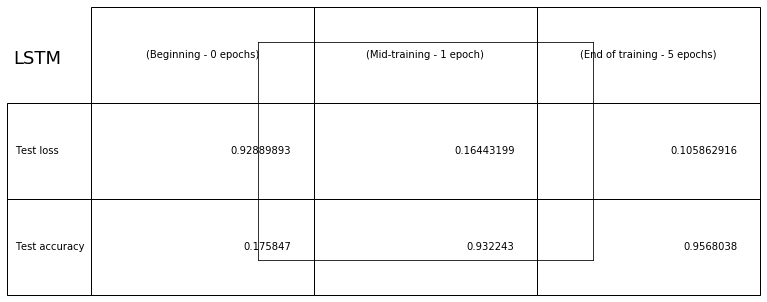

In [195]:
plot_summary_table(experiment_results)
plt.show()

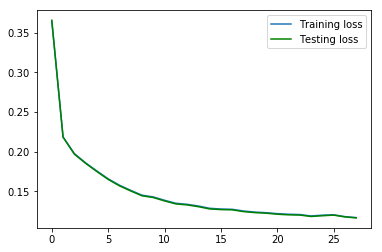

In [163]:
plot_learning_curves(train_losses, test_losses)
plt.show()

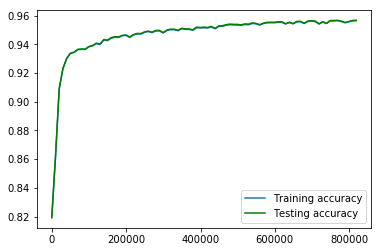

In [196]:
def plot_learning_curves_acc(training_accuracy, testing_accuracy):
  plt.figure()
  plt.plot(*training_accuracy)
  plt.plot(*testing_accuracy, 'g')
  plt.legend(['Training accuracy', 'Testing accuracy'])
plot_learning_curves_acc(zip(*[(i *batch_size*n_batches_per_log, train_accs[i]) for i in range(len(train_accs))]),
                         zip(*[(i *batch_size*n_batches_per_log, test_accs[i]) for i in range(len(test_accs))]))
plt.show()

# Pixel prediction

### Generate a small in-painting dataset.
Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

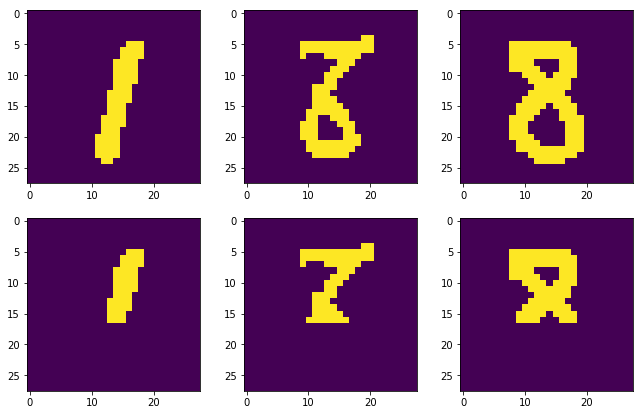

In [197]:
#Sample 100 images + mask
infill_sample_is = np.random.choice(range(n_infill_images), 3, replace=False)
infill_y = inf_data[infill_sample_is]
infill_masked = np.zeros(infill_y.shape)
infill_masked[:, :-n_infill_missing_pixels] = infill_y[:, :-n_infill_missing_pixels]
infill_y = infill_y.reshape(3, 28, 28)
infill_masked = infill_masked.reshape(3, 28, 28)
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(infill_y[0])
axarr[0,1].imshow(infill_y[1])
axarr[0,2].imshow(infill_y[2])
axarr[1,0].imshow(infill_masked[0])
axarr[1,1].imshow(infill_masked[1])
axarr[1,2].imshow(infill_masked[2])
f.set_size_inches(11, 7)
plt.show()

### Predict missing parts and compare with the ground truth. 
Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).

In [198]:
#Use the model for predictions and compare log likelihood
## See above
print("Epoch 0, 1 and " + str(n_epochs) + " in-filling cross entropies & accuracies:")
for i in range(len(infill_results)):
  ces, accs = get_inf_ce_acc(infill_results[i])
  print("  Cross entropy: 1 pixel: " + str(ces[0]) + \
          ", 10 pixels: " + str(ces[1]) + \
          ", 28 pixels: " + str(ces[2]) + \
          ", 300 pixels: " + str(ces[3]))
for i in range(len(infill_results)):
  ces, accs = get_inf_ce_acc(infill_results[i])
  print("  Accuracy: 1 pixel: " + str(accs[0]) + \
          ", 10 pixels: " + str(accs[1]) + \
          ", 28 pixels: " + str(accs[2]) + \
          ", 300 pixels: " + str(accs[3]))

Epoch 0, 1 and 15 in-filling cross entropies & accuracies:
  Cross entropy: 1 pixel: 0.866929, 10 pixels: 0.7712255, 28 pixels: 0.9031618, 300 pixels: 0.95127404
  Cross entropy: 1 pixel: 0.32061663, 10 pixels: 0.66617405, 28 pixels: 0.47417372, 300 pixels: 1.5401691
  Cross entropy: 1 pixel: 0.24260016, 10 pixels: 0.40475368, 28 pixels: 0.21834508, 300 pixels: 0.58064127
  Accuracy: 1 pixel: 0.28, 10 pixels: 0.44699997, 28 pixels: 0.2375, 300 pixels: 0.1625
  Accuracy: 1 pixel: 0.9, 10 pixels: 0.706, 28 pixels: 0.75107145, 300 pixels: 0.3906
  Accuracy: 1 pixel: 0.91, 10 pixels: 0.82799995, 28 pixels: 0.91642857, 300 pixels: 0.7793666


### Visualize completing the image. 
Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include \textit{a successful example, failure example and one that displays high variance between samples.}

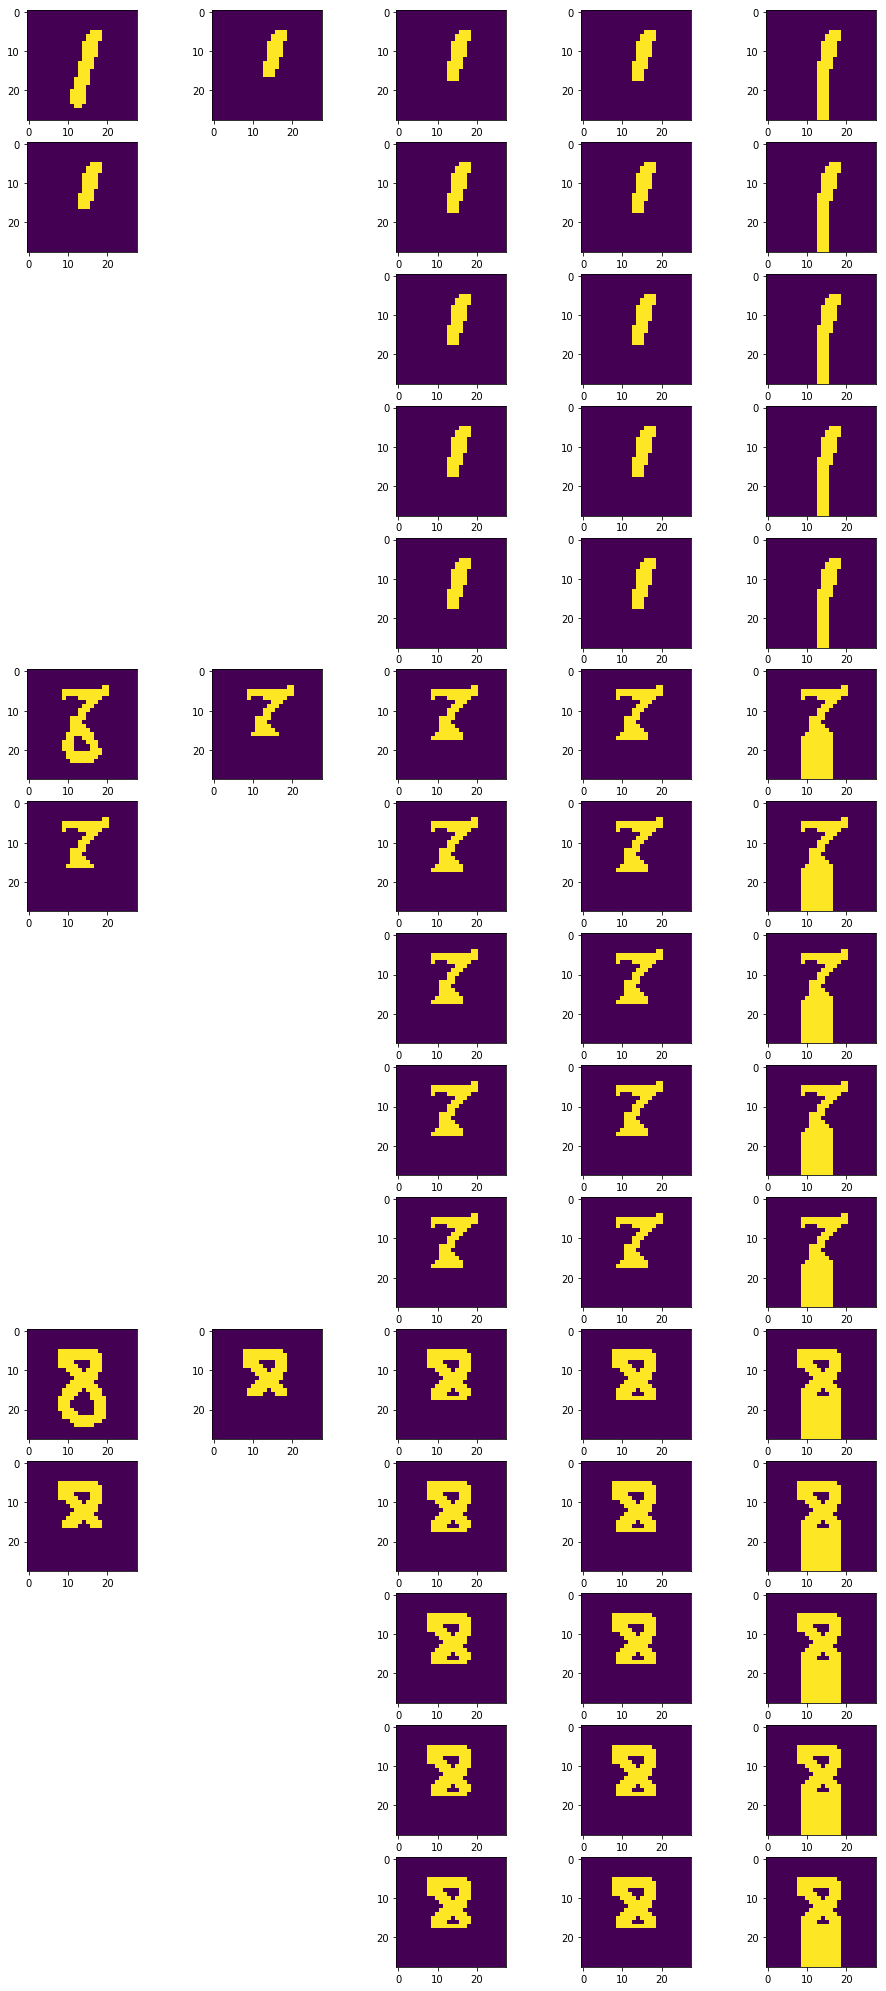

In [199]:
#Visualize samples
infilled_mask = np.copy(infill_masked).reshape(3, -1)
f, axarr = plt.subplots(3 * 5,5)
inf_pxi = n_pixels - n_infill_missing_pixels
def get_inf_res(inf_res, epoc, nfi, i, s_i):
  return inf_res[epoc][nfi][i][0][s_i] if nfi != 0 else infill_results[epoc][nfi][0][s_i]
axarr[0, 0].imshow(infill_y[0].reshape(28, 28))
axarr[5, 0].imshow(infill_y[1].reshape(28, 28))
axarr[10, 0].imshow(infill_y[2].reshape(28, 28))
axarr[1, 0].imshow(infill_masked[0].reshape(28, 28))
axarr[6, 0].imshow(infill_masked[1].reshape(28, 28))
axarr[11, 0].imshow(infill_masked[2].reshape(28, 28))
for j in range(3):
  for i in range(2, 5):
    axarr[(j * 5) + i, 0].set_visible(False)
for nfi, n_filled in enumerate([1, 10, 28, 300]):
  infilled_y = np.copy(infilled_mask)
  for j in range(3):
    if n_filled != 1:
      sample_is = np.random.choice(range(10), 5, replace=False)
      for i in range(5):
        infilled_y_j = np.copy(infilled_y[j])
        infilled_y_j[inf_pxi:inf_pxi + n_filled] = \
          get_inf_res(infill_results, 2, nfi, sample_is[i], infill_sample_is[j])
        axarr[(j * 5) + i, nfi + 1].imshow(infilled_y_j.reshape(28, 28))
    else:
      infilled_y[j, inf_pxi:inf_pxi + n_filled] = get_inf_res(infill_results, 2, nfi, 0, infill_sample_is[j])
      axarr[j * 5, nfi + 1].imshow(infilled_y[j].reshape(28, 28))
      for i in range(1, 5):
        axarr[(j * 5) + i, nfi + 1].set_visible(False)
f.set_size_inches(16, 36)
plt.show()

# In-painting Task

### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


In [454]:
# Downloading the inpainting datasets
!git clone https://github.com/dianaborsa/compgi22_dl_cw4.git

fatal: destination path 'compgi22_dl_cw4' already exists and is not an empty directory.


In [445]:
# Load the dataset (2X2)
dataset = np.load('compgi22_dl_cw4/2X2_pixels_inpainting.npy')

Loaded dataset has 1000 samples: cropped + GT


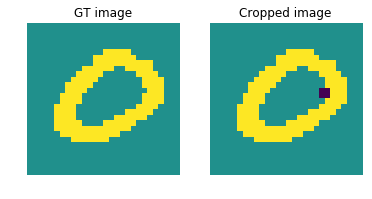

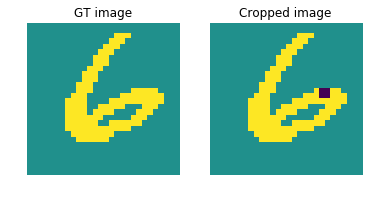

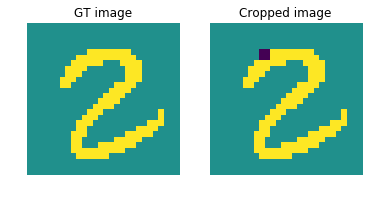

In [448]:
# checking loading
images    = dataset[0]
gt_images = dataset[1] 

nSamples, ndim = gt_images.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(np.reshape(gt_images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("GT image")
  plt.grid(False)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(np.reshape(images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')
plt.show()

### One-pixel prediction 

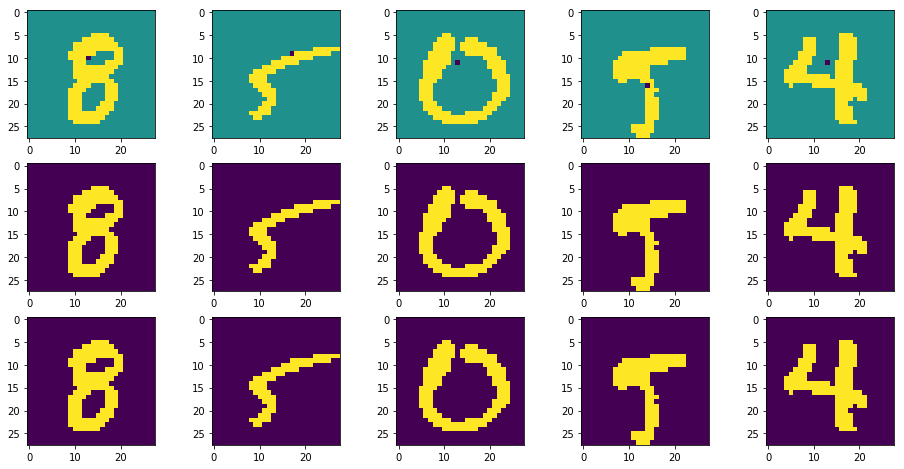

In [168]:
# Predicting the missing pixel
## See above

# Visualize samples
n_vis_samples = 5
infilled_mask = np.copy(infill_masked).reshape(3, -1)
f, axarr = plt.subplots(3, n_vis_samples)
for i in range(n_vis_samples):
    ind = np.random.randint(inp1_data.shape[0])
    axarr[0, i].imshow(inp1_dataset[0][ind].reshape(28, 28))
    axarr[1, i].imshow(inp1_data[ind].reshape(28, 28))
    axarr[2, i].imshow(inpaint_results[2][0][0][ind].reshape(28, 28))
f.set_size_inches(16, 8)
plt.show()

### Two-by-two patch prediction 

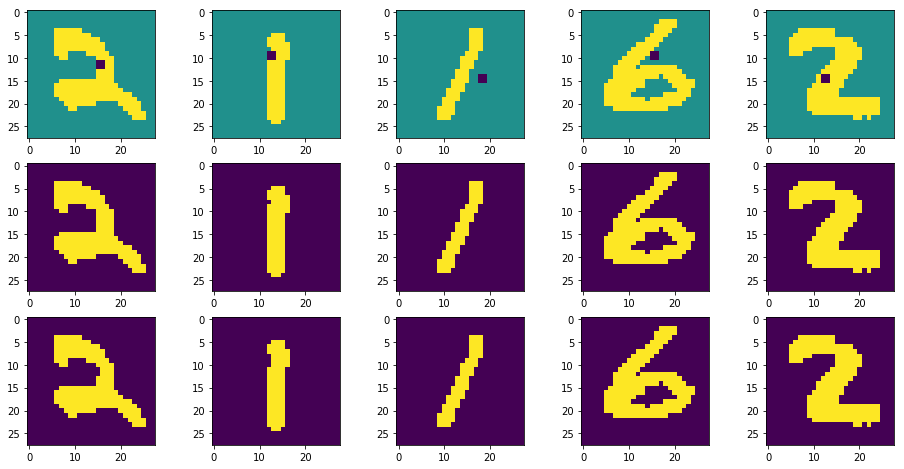

 Patches 
 Ground truth 
 In-painting


In [169]:
# Predicting the missing pixel
## See above

# Visualize samples
n_vis_samples = 5
print(" Patches \n Ground truth \n In-painting")
infilled_mask = np.copy(infill_masked).reshape(3, -1)
f, axarr = plt.subplots(3, n_vis_samples)
for i in range(n_vis_samples):
    ind = np.random.randint(inp2_data.shape[0])
    axarr[0, i].imshow(inp2_dataset[0][ind].reshape(28, 28))
    axarr[1, i].imshow(inp2_data[ind].reshape(28, 28))
    axarr[2, i].imshow(inpaint_results[2][1][0][ind].reshape(28, 28))
f.set_size_inches(16, 8)
plt.show()

In [177]:
from scipy.stats import dirichlet
dirichlet.mean((10, 1, 1))
dirichlet.rvs((1, 1, 1))

array([[0.04222409, 0.36406826, 0.59370766]])

----------------------------------------------------------------------

## PART 2: Learning multiple tasks with LSTM-s (40 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $3$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$. 
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $3$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. Similar to the pixel-to-pixel model, at each time step the LSTM will receive one bit of information (gets to observe the symbol recorded at this time step) and need to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.

### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,1.,1.)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

The LSTM model would learn to approximate the current distribution of the symbols coming in through the input at that time - which will almost always be strongly biased towards the first symbol, and so, depending on the number of time steps $T$, and the number of time steps since the last reset symbol $t \mod T$, the model would learn to output symbols based on the probabilities somewhere between the mean of the dirichlet distribution used to generate the multinomial (~$[0.83, 0.083, 0.083]$) if $T$ or $t \mod T$ is low (i.e. 5), and the actual multinomial distribution used to generate the input at the current time step (~$Dirichlet((10, 1, 1))$) if $T$ or $t-kT$ is high, i.e. 20.

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  

Now the model would (after enough training samples) learn to output symbols uniformly at the beginning of new sequences (where $t \mod T < \sim 5$), then begin to output symbols according to the incoming input distribution (the multinomial sampled from the dirichlet for the current sequence).

* How does this (learning ability and generalization) depend on the lenght of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)

The learning ability and generalization would be greater when $T$ is large, and also when the unrolling length of the LSTM is large. For $T$, this is because it gives the model more time and therefore more data to approximate the parameters of the multinomial distribution. For the unrolling length, this is because it gives the recurrent model more experience with a changing multinomial, so it can more easily learn to adjust when it sees the reset symbol. When $T$ is small (or 1), the signal contains very little (or no) information about the multinomial distribution that generated it, because there are so few samples. In this case, the model would learn to generate symbols approximately according to the mean of dirichlet prior for the dataset. If $T$ is more than 1 but still low, the conditioning on the output probability due to these few samples for the sequence would be negligible, as they are so noisy. If $T$ is very high (or $\infty$), then we have abundant (or perfect) information about the multinomial distribution that generated the samples just from counting the occurences of each symbol, and the model will comfortably learn to generate output according to this distribution. In either case, if the unrolling length of the LSTM is low, then the model won't learn to reset it's multinomial parameter approximations when it sees the reset symbol, and would therefore have lower accuracy at the beginning of the next sequence.

* Does this increase or descrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$?

With a larger $T$, the complexity of the problem overall (and equally weighted over $t$) is reduced because the output becomes much easier to predict as $t$ increases. For the unrolling length, since the longer the unrolling length, the easier it becomes to learn to reset effectively (better generalization to unseen $\textbf{p}$), then the prediction problem becomes easier and less complex as we no longer have to learn what the reset symbol means from short sequences with only a few of them.

2) **Time to check your intuitions (10 pts)** 

Implement a similar LSTM model as in PART 1. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into a 32-unit LSTM and LSTM output is processed as before: $\textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}$ . The model will be trained, as before, by cross-entropy on predicting the next symbol. You will notice that the setup is really similar to the previous tasks, so feel free to re-use whenever appropiate.

Train the following models:
* T = 5, and T=20 with the data generated from a Dirichlet with $\alpha = (10.,1.,1.)$. Unrolling length for the LSTM = 100. Minibatch size = 64. (M1, M2)
* T = 5, and T=20 with the data generated from a Dirichlet with$\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 100. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this curve smooth? Do any of them plateau?). **[2x5 pts]**


3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (10.,1.,1.)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(1,0,0)$ (You can use any of the extreme here).

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=20$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**

4) **Comparison to the Bayesian update (15 pts)**

Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[3 pts]**

$ \alpha = $ prior for the distribution over $\mathbf{p}_0$

$ \mathcal{X}_t = \{x_{(t \mod T) + 1}, \cdots, x_t\}$

$ c_t \in [0,t \mod T]^4 = $ symbol counts for the $t \mod T$ samples for sequence $k$ observed so far ($\mathcal{X}_t$)

$ \mathbf{p}_t \sim Dirichlet(c_t + \alpha)$

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=20$ and respectively models M2 and M4.

5) **Play (not for credit, just for fun)**

Visualize the hidden state of the LSTM. Look at the eigenvalues: How many of these are actual revelant? What do they correspond to?




In [0]:
#@title Generate data function

n_symbols = 3
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.3, 1.3, 1.3), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
  

### Training your recurrent model

In [0]:
#@title Your models

import itertools
from tensorflow.contrib import rnn

# Constants
c_type = 'LSTM'
n_units = 32
fully_connected_units = 64
learning_rate = 0.001
batch_size = 64
n_batches_per_log = 39
test_batch_size = 64
n_labels = 4
dropout_keep_prob = 0.87
lstm_forget_bias = 1.0

# Convert sequence format to x, y for training (shift forward 1 pixel)
def x_y_for_seq(x, y):
  return x[:, :-1], y[:, 1:]

# Tensorflow np.repeat implementation (repeats each element of x, n times, preserving order)
def tf_repeat(x, n):
  return tf.reshape(tf.transpose(tf.tile(tf.reshape(x, [1, -1]), [n, 1])), [-1])

# Get RNN cell (LSTM or GRU)
def get_rnn_cell(c_type, n_units, lstm_forget_bias, keep_prob):
  cell = rnn.GRUCell(n_units) if c_type == "GRU" else \
         rnn.LSTMCell(n_units, forget_bias=lstm_forget_bias)
  return rnn.DropoutWrapper(cell, input_keep_prob=1.0, output_keep_prob=keep_prob)

# Get next formatted batch from multiple tasks dataset
def get_next_batch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  d = get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None)
  return x_y_for_seq(d, d)

# Model structure after the RNN
def post_rnn_model(x, W_1, W_2, b_1, b_2):
    return tf.matmul(tf.nn.relu(
           tf.matmul(tf.nn.relu(x), W_1) + b_1), W_2) + b_2
#            tf.layers.batch_normalization(tf.matmul(tf.nn.relu(x), W_1))), W_2) + b_2

# In-filling cell body
def inf_cell_body(i, y, y_s, s, cell, W_1, W_2, b_1, b_2):
  o, s_ = cell(tf.reshape(tf.cast(tf.argmax(y, axis=1), tf.float32), [-1 ,1]), s)
  y_ = post_rnn_model(o, W_1, W_2, b_1, b_2)
  return [y_, tf.concat([y_s[:, :i, :], tf.reshape(y_, [-1, 1, n_labels]), y_s[:, i+1:, :]], axis=1), s_]

# Get cross entropy and accuracy for infill results for all n_infill_pixels [1, 10, 28, 300]
def get_inf_ce_acc(inf_r):
  return [inf_r[0][1]] + [np.mean([inf_r[i + 1][j][1] for j in range(n_infill_samples)]) for i in range(3)], \
         [inf_r[0][2]] + [np.mean([inf_r[i + 1][j][2] for j in range(n_infill_samples)]) for i in range(3)]

# Test in-painting (batch data, generate result for full dataset)
def test_inpainting(test_inpaint_func, n):
  a_, b_, c_, d_ = (inp1_data, inp1_missing_pixels, inp1_missing_y, inp1_poss_images) if n == 1 else \
                   (inp2_data, inp2_missing_pixels, inp2_missing_y, inp2_poss_images)
  res = [test_inpaint_func(a_[i * inpainting_batch_size:(i + 1) * inpainting_batch_size],
                           b_[i * inpainting_batch_size:(i + 1) * inpainting_batch_size],
                           c_[i * inpainting_batch_size:(i + 1) * inpainting_batch_size],
                           d_[:, i * inpainting_batch_size:(i + 1) * inpainting_batch_size]
                          ) for i in range(a_.shape[0] // inpainting_batch_size)]
  result = []
  for i in range(len(res[0])):
    result.append(np.mean(
        [r[i] for r in res]) if res[0][i].ndim < 2 or res[0][i].shape[1] < 2 else np.vstack([r[i] for r in res]))
  return result

# Train and test model
def train_test_bandit_model():
  
  exp_res = {c_type: []}
  inf_res, inp_res = [], []
  inf_gts, inp_gts = None, None
    
  with tf.device('/device:GPU:*'):

    tf.reset_default_graph()
    izer = tf.contrib.layers.xavier_initializer()
    x, y_ = get_placeholders()
    keep_prob = tf.placeholder(tf.float32)
    n_x, n_x_pixels = tf.shape(x)[0], tf.shape(x)[1]

    #  Define network variables
    W_1 = tf.Variable(izer([n_units, fully_connected_units]))
    b_1 = tf.Variable(izer([fully_connected_units]))
    W_2 = tf.Variable(izer([fully_connected_units, n_labels]))
    b_2 = tf.Variable(izer([n_labels]))
    x_tr = tf.reshape(x, [n_x, n_x_pixels, 1])
    y_tr = tf.one_hot(tf.cast(y_, tf.int64), n_labels)
    y_tr_px = tf.reshape(y_tr, [-1, n_labels])
    
    #  Define network structure
    cell = get_rnn_cell(c_type, n_units, lstm_forget_bias, keep_prob)
    outputs, states = tf.nn.dynamic_rnn(cell, x_tr, dtype=tf.float32)
    output = tf.reshape(outputs, [-1, n_units])
    y_logits = post_rnn_model(output, W_1, W_2, b_1, b_2)
    
    #  Define loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_tr_px, logits=y_logits))
    
    #  Define accuracy computation
    y = tf.reshape(tf.argmax(y_logits, axis=1), [n_x, n_x_pixels])
    correct = tf.equal(y, tf.cast(y_, tf.int64))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    ###  Pixel In-Filling  ###
    inf_images = tf.placeholder(tf.float32, [None, n_pixels])
    inf_n_images = tf.shape(inf_images)[0]
    inf_n_missing = tf.placeholder(tf.int32)
    inf_n_pixels = tf.placeholder(tf.int32)
    flip_index = tf.shape(inf_images)[1] - inf_n_missing
    partial_seq = inf_images[:, :flip_index]
    remaining_seq = tf.cast(inf_images[:, flip_index:flip_index + inf_n_pixels], tf.int64)
    init_seq = tf.reshape(partial_seq[:, :-1], [inf_n_images, -1, 1])
    inf_y_init = tf.one_hot(tf.cast(partial_seq[:, -1], tf.int64), n_labels)
    inf_outputs, inf_state = tf.nn.dynamic_rnn(cell, init_seq, dtype=tf.float32)
    inf_i = tf.constant(0)
    cond = lambda i, y, y_s, s: i < inf_n_pixels
    body = lambda i, y, y_s, s: [i + 1] + inf_cell_body(i, y, y_s, s, cell, W_1, W_2, b_1, b_2)
    inf_is, int_last_y, inf_ys, inf_states = tf.while_loop(cond, body, [inf_i,
      inf_y_init, tf.zeros((inf_n_images, inf_n_pixels, n_labels)), inf_state])
    inf_ys_ = tf.reshape(inf_ys, [-1, n_labels])
    inf_y_ = tf.reshape(tf.one_hot(remaining_seq, n_labels), [-1, n_labels])
    inf_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inf_y_, logits=inf_ys_))
    inf_gt_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inf_y_, logits=inf_y_))
    inf_y = tf.reshape(tf.argmax(inf_ys_, axis=1), [tf.shape(inf_images)[0], -1])
    inf_acc = tf.reduce_mean(tf.cast(tf.equal(inf_y, remaining_seq), tf.float32))
    infill_gt_ce = lambda: [sess.run([inf_gt_ce], feed_dict={inf_images: inf_data,
      inf_n_missing: n_infill_missing_pixels, inf_n_pixels: i, keep_prob: 1.0}) for i in [1, 10, 28, 300]]
    test_infill = lambda n_infill: sess.run([inf_y, inf_ce, inf_acc], feed_dict={
      inf_images: inf_data, inf_n_missing: n_infill_missing_pixels, inf_n_pixels: n_infill, keep_prob: 1.0})
    all_infill_tests = lambda: [test_infill(1), [test_infill(10) for _ in range(n_infill_samples)],
                                                [test_infill(28) for _ in range(n_infill_samples)],
                                                [test_infill(300) for _ in range(n_infill_samples)]]

    ###  Pixel Patch In-Painting  ###
    inp_images = tf.placeholder(tf.float32, [None, n_pixels])
    inp_n_images = tf.shape(inp_images)[0]
    inp_missing_is = tf.placeholder(tf.int64, [None, None])
    inp_n_missing = tf.shape(inp_missing_is)[1]
    inp_y_ = tf.placeholder(tf.int64, [None, None])
    inp_poss = tf.placeholder(tf.float32, [None, None, n_pixels]) # Possible in-painted images to test
    inp_n_poss = tf.shape(inp_poss)[0]
    inp_y_flat_ = tf.reshape(inp_y_, [inp_n_images * inp_n_missing])
    inp_y_labels_ = tf.one_hot(inp_y_flat_, n_labels)
    inp_imgs_oh = tf.one_hot(tf.reshape(tf.cast(inp_images[:, 1:], tf.int64), [-1]), n_labels)
    inp_input = tf.reshape(inp_poss, [inp_n_poss * inp_n_images, n_pixels])
    inp_input_y = tf.reshape(inp_input[:, 1:], [-1])
    
    #  RNN and pixel logits/probabilities
    inp_input_ = tf.reshape(inp_input, [inp_n_poss * inp_n_images, n_pixels, 1])[:, :-1]
    inp_outs, inp_state = tf.nn.dynamic_rnn(cell, inp_input_, dtype=tf.float32)
    inp_px_outs = tf.reshape(inp_outs, [inp_n_poss * inp_n_images * (n_pixels - 1), n_units])
    inp_px_logits = post_rnn_model(inp_px_outs, W_1, W_2, b_1, b_2)
    inp_logits = tf.reshape(inp_px_logits, [inp_n_poss, inp_n_images, (n_pixels - 1), n_labels])
    inp_px_probs = tf.nn.softmax(inp_px_logits)
    inp_probs_ = tf.where(tf.cast(inp_input_y, tf.bool), inp_px_probs[:, 1], inp_px_probs[:, 0])
    inp_probs = tf.reshape(inp_probs_, [inp_n_poss, inp_n_images, n_pixels - 1])

    #  Argmax image (log-)probability, get resulting logits & in-painting patch
    inp_logprobs = tf.log(inp_probs)
    inp_img_logprobs = tf.reduce_sum(inp_logprobs, axis=2)
    inp_y_patch_is = tf.argmax(inp_img_logprobs, axis=0)
    inp_y_imgs=tf.gather_nd(inp_poss,tf.stack([inp_y_patch_is,tf.cast(tf.range(inp_n_images),tf.int64)],axis=1))
    inp_yil =tf.gather_nd(inp_logits,tf.stack([inp_y_patch_is,tf.cast(tf.range(inp_n_images),tf.int64)],axis=1))
    inp_y = tf.gather_nd(inp_y_imgs, tf.stack([tf_repeat(tf.cast(tf.range(inp_n_images),
                         tf.int64), inp_n_missing), tf.reshape(inp_missing_is, [-1])], axis=1))
    inp_yl = tf.gather_nd(inp_yil, tf.stack([tf_repeat(tf.cast(tf.range(inp_n_images),
                         tf.int64), inp_n_missing), tf.reshape(inp_missing_is - 1, [-1])], axis=1))
    
    #  Cross-entropy and accuracy calculation
    inp_acc = tf.reduce_mean(tf.cast(tf.equal(tf.cast(inp_y, tf.int64), inp_y_flat_), np.float32))
    inp_px_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_y_labels_, logits=inp_yl))
    inp_img_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_imgs_oh,
                                                                    logits=tf.reshape(inp_yil, [-1, n_labels])))
    inp_px_ce_gt=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_y_labels_,logits=inp_y_labels_))
    inp_img_ce_gt=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_imgs_oh,logits=inp_imgs_oh))
    
    #  Evaluation functions
    test_inpaint_gt_ = lambda a_, b_, c_, d_: sess.run([inp_px_ce_gt, inp_img_ce_gt], feed_dict={
        inp_images: a_, inp_missing_is: b_, inp_y_: c_, inp_poss: d_, keep_prob: 1.0})
    test_inpaint_ = lambda a_, b_, c_, d_: sess.run([inp_y_imgs, inp_px_ce, inp_img_ce, inp_acc], feed_dict={
        inp_images: a_, inp_missing_is: b_, inp_y_: c_, inp_poss: d_, keep_prob: 1.0})
    test_inpaint_gt_1 = lambda: test_inpainting(test_inpaint_gt_, 1)
    test_inpaint_gt_2 = lambda: test_inpainting(test_inpaint_gt_, 2)
    test_inpaint_1 = lambda: test_inpainting(test_inpaint_, 1)
    test_inpaint_2 = lambda: test_inpainting(test_inpaint_, 2)

    #  Define batched model testing (to avoid memory errors)
    test_model = lambda x_tst, y_tst: tuple(np.mean(np.asarray([sess.run([cross_entropy, accuracy], feed_dict={
      x: x_tst[i * test_batch_size:(i + 1) * test_batch_size], y_: y_tst[i * test_batch_size:(i + 1) * \
      test_batch_size], keep_prob: 1.0}) for i in range(n_test // test_batch_size)]), axis=0))

    #  Define training step
    train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

    #  Train
    n_x_seen = 0
    train_losses, test_losses, train_accs, test_accs = [], [], [], []
    with tf.train.MonitoredSession() as sess:

      exp_res[c_type].append(test_model(x_test, y_test))  #  0 Epochs results
      inf_res.append(all_infill_tests())
      inp_res.append((test_inpaint_1(), test_inpaint_2()))
      inf_ces, inf_accs = get_inf_ce_acc(inf_res[-1])
      inf_gts = infill_gt_ce()                          #  Get ground truth cross entropies
      inp_gts = test_inpaint_gt_1() + test_inpaint_gt_2()
      print("In-filling ground truth cross entropies:", inf_gts)  #  Print results
      print("In-painting ground truth cross entropies [px,img] 1x1:", inp_gts[0:2], ", 2x2:", inp_gts[2:4])
      print("In-filling ces:", inf_ces, ", accs:", inf_accs)
      print("In-painting (pxce,imgce,acc) 1x1:", inp_res[-1][0][1:], ", 2x2:", inp_res[-1][1][1:])

      #  Training loop
      while mnist.train.epochs_completed < n_epochs:

        if mnist.train.epochs_completed == 1 and len(exp_res[c_type]) == 1:  #  1 Epoch results
          exp_res[c_type].append(test_model(x_test, y_test))
          inf_res.append(all_infill_tests())
          inp_res.append((test_inpaint_1(), test_inpaint_2()))

        #  Get new batch of training data, run training step
        batch_xs, batch_ys = get_next_batch(mnist, batch_size)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: dropout_keep_prob})
        n_x_seen += batch_size

        #  Log performance results
        if n_x_seen % (batch_size * n_batches_per_log) == 0 or mnist.train.epochs_completed >= n_epochs:
          test_loss, test_acc = test_model(x_test, y_test)  #  Model testing
          train_loss, train_acc = test_model(x_train_test, y_train_test)
          test_losses.append(test_loss)
          test_accs.append(test_acc)
          train_losses.append(train_loss)
          train_accs.append(train_acc)
          n_epochs_seen = round(n_x_seen / n_train, 2)
          print('\nn:', n_x_seen, ', n_epochs:', n_epochs_seen, ', test loss, acc:', test_loss, test_acc,
                                                              ', train loss, acc:', train_loss, train_acc)
          #  Pixel in-filling and in-painting
          inf_ces, inf_accs = get_inf_ce_acc(all_infill_tests())
          print("In-filling ces:", inf_ces, ", accs:", inf_accs)
          print("In-painting (pxce,imgce,acc) 1x1:", test_inpaint_1()[1:], ", 2x2:", test_inpaint_2()[1:])
          
      exp_res[c_type].append(test_model(x_test, y_test))  #  Full Epochs result
      inf_res.append(all_infill_tests())
      inp_res.append((test_inpaint_1(), test_inpaint_2()))

    return exp_res, inf_gts, inf_res, inp_gts, inp_res, train_losses, test_losses, train_accs, test_accs

In [0]:
#@title Training


### Analysing your recurrent model

In [0]:
# Plot learning curves 

In [0]:
# Visualize performance on the test sequences:

# Sample generation of test sequence:
# get_minibatch(batch_size, num_tasks_per_batch, num_samples_per_task-1, p=[1.0, 0.0, 0.0])

### Bayesian Updates

In [0]:
# Implement Bayesian update (as if you knew the 'right' prior and model)


# From the posterior infer the mean of the probability vector. Use this as your 
# estimate to compare again the LSTM predictions


In [0]:
# Visualize and compare performance on the test sequences:

In [0]:
#     outputs_, states_, ys, ces = [], [], [], []
#     state = izer((n_x, n_units))
#     for i in range(n_x_pixels):
#       input_ = x[:, i]
#       output, new_state = cell(input_, state)
#       outputs_.append(output)
#       states_.append(new_state)
#       state = new_state
        
#       # Define post-RNN network structure
#       relu_1 = tf.nn.relu(output)
#       relu_2 = tf.nn.relu(tf.matmul(relu_1, W_1) + b_1)
#       y_px = tf.matmul(relu_2, W_2) + b_2
#       ys.append(tf.argmax(y_px))
#       # y_prob = tf.nn.softmax(y)

#       #  Define loss function & training step
#       ces.append(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
#           labels=tf.squeeze(y_tr[:, i, :]), logits=ys)))
#     cross_entropy = tf.reduce_mean(tf.stack(ces))
#     train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
    
#      # Define accuracy computation
#     y = tf.stack(ys, axis=1)
#     correct = tf.equal(y, y_)
#     accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
#     # Define outputs & states tensors
#     outputs = tf.stack(outputs_, axis=1)
#     states = tf.stack(states_, axis=1)

#       if get_full_outputs:
#         o, s, y, l, a = sess.run([outputs, states, y, cross_entropy, accuracy], feed_dict={x: x_test, y_: x_test, keep_prob: 1.0})
#         return x_test, o, s, y, l, a
#       else:
#         return sess.run([cross_entropy, accuracy], feed_dict={x: x_test, y_: x_test, keep_prob: 1.0})
    
#     inp_prefix = tf.reshape(inp_input, [inp_n_x, n_pixels, 1])

#     inp_suffix = tf.reshape(inp_input_rev, [inp_n_x, n_pixels, 1])
#     static_inputs = [inp_prefix[:, i, :] for i in range(n_pixels)]
#     inp_pre_outs, inp_pre_state = tf.nn.static_rnn(cell, static_inputs, sequence_length=inp_missing, dtype=tf.float32)

#     inp_pre_outs, inp_pre_state = tf.nn.dynamic_rnn(cell, inp_prefix, sequence_length=inp_missing, dtype=tf.float32)
#     inp_suf_outs, inp_suf_state = tf.nn.dynamic_rnn(cell, inp_suffix, sequence_length=n_pixels - inp_missing - 1, dtype=tf.float32)

#     inp_swap = inp_missing < n_pixels // 2
#     inp_prefix = tf.reshape(tf.where(inp_swap, inp_images_rev, inp_images), [-1, n_pixels, 1])
#     inp_suffix = tf.reshape(tf.where(inp_swap, inp_images, inp_images_rev), [-1, n_pixels, 1])
#     inp_prefix_i = tf.where(inp_swap, n_pixels - inp_missing - 1, inp_missing)
#     inp_suffix_i = tf.where(inp_swap, inp_missing, n_pixels - inp_missing - 1)
#     inp_pre_outs, inp_pre_state = tf.nn.dynamic_rnn(cell, inp_prefix, sequence_length=inp_prefix_i, dtype=tf.float32)
#     inp_suf_outs, inp_suf_state = tf.nn.dynamic_rnn(cell, inp_suffix, sequence_length=inp_suffix_i, dtype=tf.float32)

#     inp_pre_outs_ = tf.gather_nd(inp_pre_outs, tf.stack([tf.range(inp_n_x), inp_missing - 1], axis=1))
#     inp_pre_y_logits = post_rnn_model(inp_pre_outs_, W_1, W_2, b_1, b_2)

#     inp_pre_y_logits = post_rnn_model(tf.reshape(inp_pre_outs[:, -1, :], [inp_n_x, n_units]), W_1, W_2, b_1, b_2)
#     inp_suf_y_logits = post_rnn_model(tf.reshape(inp_suf_outs[:, -1], [-1, n_units]), W_1, W_2, b_1, b_2)
#     inp_y_logits = (inp_pre_y_logits + inp_suf_y_logits) / 2
#     inp_y_logits = inp_pre_y_logits
#     inp_y = tf.argmax(inp_y_logits, axis=1)
# #     inp_y_avg = tf.reduce_mean(tf.cast(inp_y, tf.float32))
#     inp_ce = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_y_labels_, logits=inp_y_logits))
#     inp_gt_ce=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=inp_y_labels_,logits=inp_y_labels_))
#     inp_acc = tf.reduce_mean(tf.cast(tf.equal(inp_y, inp_y_), np.float32))

#     inp_pre_outs_f = inp_pre_outs_[:, 16]
#     inp_prefix_0 = tf.shape(inp_pre_outs)

# inp1_pre_input = np.zeros(inp1_data.shape)
# inp1_suf_input = np.zeros(inp1_data.shape)
# for i in range(len(inp1_data)):
#     inp1_pre_input[i, :inp1_missing_pixels[i]] = inp1_data[i, :inp1_missing_pixels[i]]
#     inp1_suf_input[i, inp1_missing_pixels[i] + 1:] = inp1_data[i, inp1_missing_pixels[i] + 1:]